<a href="https://colab.research.google.com/github/prp20/tensorflow_learning/blob/main/notebooks/Tensorflow_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84125825/84125825 [==============================] - 7s 0us/step


In [ ]:
os.listdir(dataset_dir)

['imdbEr.txt', 'train', 'README', 'test', 'imdb.vocab']

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_neg.txt',
 'pos',
 'unsup',
 'urls_unsup.txt',
 'urls_pos.txt',
 'unsupBow.feat',
 'labeledBow.feat',
 'neg']

In [ ]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [ ]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [ ]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test', 
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<[^>]+>', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
train_text


<MapDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>

In [ ]:
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
embedding_dim = 16

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
625/625 [==============================] - 12s 15ms/step - loss: 0.6652 - binary_accuracy: 0.6913 - val_loss: 0.6170 - val_binary_accuracy: 0.7708
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5507 - binary_accuracy: 0.7986 - val_loss: 0.5001 - val_binary_accuracy: 0.8198
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4469 - binary_accuracy: 0.8443 - val_loss: 0.4213 - val_binary_accuracy: 0.8468
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3793 - binary_accuracy: 0.8654 - val_loss: 0.3746 - val_binary_accuracy: 0.8602
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3361 - binary_accuracy: 0.8781 - val_loss: 0.3455 - val_binary_accuracy: 0.8676
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3053 - binary_accuracy: 0.8885 - val_loss: 0.3264 - val_binary_accuracy: 0.8710
Epoch 7/10
625/625 [==============================] - 3s 4ms/s

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 8s 10ms/step - loss: 0.3106 - binary_accuracy: 0.8728
Loss:  0.3105762302875519
Accuracy:  0.872759997844696


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

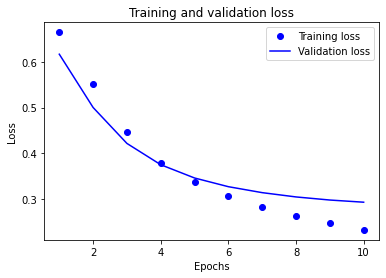

In [ ]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

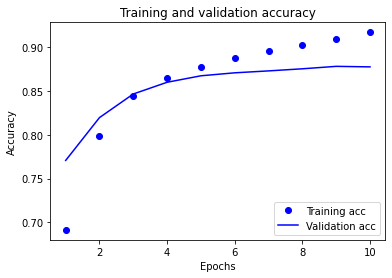

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
import pandas as pd
yelp_dataset = pd.read_csv('yelpratings.csv')


In [ ]:
yelp_dataset

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0
...,...,...,...
44525,"Petit café sympa, peu de place assise. Bonne b...",4.0,1
44526,Absolutely delicious! The food was full of ama...,5.0,1
44527,I love this place! They always have the cutes...,4.0,1
44528,i would understand a 2 hour wait for food if i...,2.0,0


In [ ]:
yelp_dataset.drop(columns =['stars'], inplace=True)

In [ ]:
yelp_dataset

,text,sentiment
0,Total bill for this horrible service? Over $8G...,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,1
2,I have to say that this office really has it t...,1
3,Went in for a lunch. Steak sandwich was delici...,1
4,Today was my second out of three sessions I ha...,0
...,...,...
44525,"Petit café sympa, peu de place assise. Bonne b...",1
44526,Absolutely delicious! The food was full of ama...,1
44527,I love this place! They always have the cutes...,1
44528,i would understand a 2 hour wait for food if i...,0


In [ ]:
labels = yelp_dataset['sentiment'].to_numpy()
text = yelp_dataset['text'].to_numpy()

labels, text

(array([0, 1, 1, ..., 1, 0, 1]),
 array(['Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs.',
        "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involv

In [ ]:
train_size = int(0.8*len(text))
test_size = int(0.2*len(text))

In [ ]:
train_text_raw, train_labels = text[:train_size], labels[:train_size]
test_text_raw, test_labels = text[train_size:], labels[train_size:]
len(train_text_raw), len(train_labels),  len(test_text_raw), len(test_labels)

(35624, 35624, 8906, 8906)

In [ ]:
vectorize_layer.adapt(train_text_raw)

In [ ]:
def vectorize_text(text):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text)

In [ ]:
train_sentences = tf.convert_to_tensor(train_text_raw)
test_sentences = tf.convert_to_tensor(test_text_raw)

In [ ]:
type(train_sentences), type(train_labels)

(tensorflow.python.framework.ops.EagerTensor, numpy.ndarray)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE).batch(32)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE).batch(32)

In [ ]:
embedding = layers.Embedding(max_features + 1, embedding_dim)

In [ ]:
input = layers.Input(shape=(), dtype=tf.string)
x = vectorize_layer(input)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(input, outputs, name = "NLP_model_1")

In [ ]:
model_1.summary()

Model: "NLP_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None,)]                 0         
                                                                 
 text_vectorization (TextVec  (None, 250)              0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 250, 16)           160016    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-tra

In [ ]:
model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(train_ds, epochs=10, validation_data =test_ds)

Epoch 1/10
1114/1114 [==============================] - 7s 6ms/step - loss: 0.5150 - accuracy: 0.7670 - val_loss: 0.4397 - val_accuracy: 0.8049
Epoch 2/10
1114/1114 [==============================] - 7s 6ms/step - loss: 0.3763 - accuracy: 0.8288 - val_loss: 0.3123 - val_accuracy: 0.8662
Epoch 3/10
1114/1114 [==============================] - 7s 6ms/step - loss: 0.2703 - accuracy: 0.8868 - val_loss: 0.2404 - val_accuracy: 0.9080
Epoch 4/10
1114/1114 [==============================] - 7s 7ms/step - loss: 0.2120 - accuracy: 0.9203 - val_loss: 0.2026 - val_accuracy: 0.9258
Epoch 5/10
1114/1114 [==============================] - 7s 6ms/step - loss: 0.1786 - accuracy: 0.9379 - val_loss: 0.1812 - val_accuracy: 0.9362
Epoch 6/10
1114/1114 [==============================] - 7s 6ms/step - loss: 0.1571 - accuracy: 0.9454 - val_loss: 0.1683 - val_accuracy: 0.9414
Epoch 7/10
1114/1114 [==============================] - 7s 6ms/step - loss: 0.1418 - accuracy: 0.9510 - val_loss: 0.1602 - val_accuracy:

In [ ]:
from tensorflow.keras import layers

input = layers.Input(shape=(), dtype="string")
x = vectorize_layer(input)
x = embedding(x)
x = layers.LSTM(units=64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(input, output, name="nlp_model_2_LSTM")

In [ ]:
model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(train_ds, epochs=10, validation_data =test_ds)

Epoch 1/10
1114/1114 [==============================] - 35s 25ms/step - loss: 0.3745 - accuracy: 0.7677 - val_loss: 0.3741 - val_accuracy: 0.7623
Epoch 2/10
1114/1114 [==============================] - 27s 25ms/step - loss: 0.5075 - accuracy: 0.7576 - val_loss: 0.5562 - val_accuracy: 0.7563
Epoch 3/10
1114/1114 [==============================] - 29s 26ms/step - loss: 0.5622 - accuracy: 0.7459 - val_loss: 0.5586 - val_accuracy: 0.7563
Epoch 4/10
1114/1114 [==============================] - 30s 27ms/step - loss: 0.5629 - accuracy: 0.7461 - val_loss: 0.5555 - val_accuracy: 0.7563
Epoch 5/10
1114/1114 [==============================] - 28s 25ms/step - loss: 0.2428 - accuracy: 0.9027 - val_loss: 0.1544 - val_accuracy: 0.9450
Epoch 6/10
1114/1114 [==============================] - 29s 26ms/step - loss: 0.1080 - accuracy: 0.9609 - val_loss: 0.1541 - val_accuracy: 0.9449
Epoch 7/10
1114/1114 [==============================] - 29s 26ms/step - loss: 0.0952 - accuracy: 0.9665 - val_loss: 0.1541 -

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) *100
  model_precision, model_recall, model_f1score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"Accuracy": model_accuracy, "Precision": model_precision, "Recall value": model_recall, "F1-Score": model_f1score}

  return model_results

In [ ]:
m2_pred = model_2.predict(test_sentences)

279/279 [==============================] - 3s 11ms/step


In [ ]:
m2_pred = tf.squeeze(tf.round(m2_pred))

In [ ]:
test_labels

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
calculate_results(test_labels, m2_pred)

{'Accuracy': 94.4980911744891,
 'Precision': 0.9465815581534369,
 'Recall value': 0.9449809117448911,
 'F1-Score': 0.9455207024285964}

In [ ]:
input = layers.Input(shape=(), dtype="string")
x = vectorize_layer(input)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model_3_1 = tf.keras.Model(input, output, name="nlp_model_3_GRU_1")
model_3_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics = ['accuracy'])
history_3_1 = model_3_1.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
1114/1114 [==============================] - 30s 25ms/step - loss: 0.1142 - accuracy: 0.9588 - val_loss: 0.1529 - val_accuracy: 0.9483
Epoch 2/10
1114/1114 [==============================] - 29s 26ms/step - loss: 0.0742 - accuracy: 0.9750 - val_loss: 0.1558 - val_accuracy: 0.9485
Epoch 3/10
1114/1114 [==============================] - 26s 24ms/step - loss: 0.0615 - accuracy: 0.9795 - val_loss: 0.1608 - val_accuracy: 0.9482
Epoch 4/10
1114/1114 [==============================] - 26s 23ms/step - loss: 0.0504 - accuracy: 0.9837 - val_loss: 0.1695 - val_accuracy: 0.9478
Epoch 5/10
1114/1114 [==============================] - 26s 23ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.2132 - val_accuracy: 0.9480
Epoch 6/10
1114/1114 [==============================] - 26s 24ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.2197 - val_accuracy: 0.9458
Epoch 7/10
1114/1114 [==============================] - 28s 25ms/step - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.2553 -